This script generates Republican primary extra tree models, tested on both the 2018 senate and governor's primaries, without the past turnout, presidential margin, or racial data.

In [28]:
#Import packages
import pandas as pd
import re
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None 
import numpy as np
from sklearn import metrics
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(5)

In [29]:
#Read in data and filter out test data
turnout_train_rep = pd.read_csv("turnout_train_rep.csv")



turnout_train_rep_use = turnout_train_rep[turnout_train_rep['Year'] != 2018]






Training
R^2:  1.0
Mean Absolute Error (MAE): 1.9474787049841823e-14
Mean Squared Error (MSE): 6.950568890610737e-28


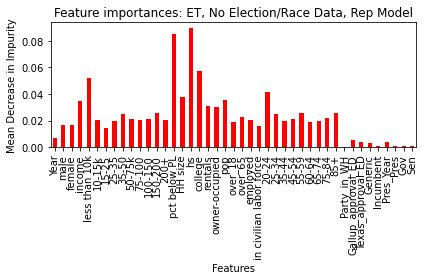

In [22]:
np.random.seed(5)
#Extra Trees: Rep model

turnout_train_rep_mod = turnout_train_rep_use


#Specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Rep_Margin', 'past_turnout','Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff', 'hispanic', 'black', 'white', 'asian', 'aapi', 'native', 'non-hispanic white'], axis = 1)

model_outcome = turnout_train_rep_mod['Turnout']

#Create model
et = ExtraTreesRegressor()
et.fit(model_feats, model_outcome);

#Make predictions
pred = et.predict(model_feats)

#Print Score
print("Training")

print("R^2: ",et.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = et.feature_importances_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(color = 'red')
plt.title("Feature importances: ET, No Election/Race Data, Rep Model")
plt.ylabel("Mean Decrease in Impurity")
plt.xlabel("Features")
fig.tight_layout()


In [12]:
np.random.seed(5)
#Test on 2018 Senate race
turnout_train_rep_mod = turnout_train_rep
#Specify election
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2018_Rep_Sen']
#Specify features and outcome

model_feats = turnout_train_rep_mod.drop(['Rep_Margin', 'past_turnout','Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff', 'hispanic', 'black', 'white', 'asian', 'aapi', 'native', 'non-hispanic white'], axis = 1)

model_outcome = turnout_train_rep_mod['Turnout']

#make predictions
pred = et.predict(model_feats)

#Print Score
print("Testing: Rep Sen 2018")

print("R^2: ",et.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



Testing: Rep Sen 2018
R^2:  0.5282687542497588
Mean Absolute Error (MAE): 4.4782271653543315
Mean Squared Error (MSE): 43.29705365358269


In [14]:
np.random.seed(5)
#Test on 2018 Gov race
turnout_train_rep_mod = turnout_train_rep
#Specify election
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2018_Rep_Gov']
#Specify features and outcome

model_feats = turnout_train_rep_mod.drop(['Rep_Margin', 'past_turnout','Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff', 'hispanic', 'black', 'white', 'asian', 'aapi', 'native', 'non-hispanic white'], axis = 1)

model_outcome = turnout_train_rep_mod['Turnout']

#make predictions
pred = et.predict(model_feats)

#Print Score
print("Testing: Rep Gov 2018")

print("R^2: ",et.score(model_feats, model_outcome))

#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



Testing: Rep Gov 2018
R^2:  0.5276355250214485
Mean Absolute Error (MAE): 4.662145275590552
Mean Squared Error (MSE): 43.44777995909449
